# Dataset "Ken Jee YouTube Data"

## Introduction

As it well known, in modern society, blogging is one of the most popular professions around the world, it is obvious that convenient automated and modern tools should be created to analyze the reaction of viewers. Bloggers working on content are interested in questions about their current and future popularity, what videos are most in demand by viewers and in general who their viewers are.

In this project, an analysis was carried out and the project "Ken Jee YouTube Data" was considered. The relevant data included is from Nov 2017 - Jan 2022. The data gathered via the YouTube API and the rest from my specific analytics. 

This report contains the following structure:
- busines problem formulation
- Machine Learning methods and explanation
- results with comparison of different Machine Learning methods
- conclusions
- bibliogrphy/references 

## Problem formulation

In this project, the main analysis will be based on this dataset:

**Aggregated Metrics By Video** - This has all the topline metrics from channel https://www.youtube.com/c/KenJee1 from its start. 

The main objective of this project will be to build a Machine Learning algorithms to predict the number of new subscribers gained.

Building a model for predicting the number of new subscribers on the channel (Label "Subscribers gained") will be based on the analysis and relationship of the following features:

- impressions,
- subscribers,
- watch time,
- likes,
- comments
affect the label"new subscribers gained per video"

For this report, the most appropriate and relevant features have been selected so that the analysis is most productive.

Solving the Machine Learning problem of predicting the number of new subscribers will be nothing more than a **regression problem**. Solving such problems is quite popular today on any blogging platforms, including YouTube and other social networks.

Dataset and content information taken from the site by Ken Jee:
https://www.kaggle.com/datasets/kenjee/ken-jee-youtube-data?select=Aggregated_Metrics_By_Video.csv

## Machine Learning methods and explanation

#### Import Python Libraries

First import the libraries to be able to call functions that needed for this prject. In this project the most useful libraries are:

- **pandas** library which offers data structures and operations for manipulating numerical tables and time series
- **numpy** library which a wide variety of mathematical operations on arrays
- **sklearn** library which provides many unsupervised and supervised learning algorithms
- **math** library is a component of a programming language's standard library containing functions (or subroutines) for the most common mathematical functions
- **seaborn** for data visualization

In [1]:
import pandas as pd
import numpy as np

import sklearn.model_selection 
import sklearn.tree 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

import math
from scipy import stats

import seaborn as sns

#### Import all datasets and short characteristics

The dataset from Kaggle is presented in the .csv format. Firstly, a read .csv file is performed in Jupyter to briefly look at the dataset

In [2]:
df = pd.read_csv("Aggregated_Metrics_By_Video.csv")
df.head()

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.276,11.990,26.61,0:03:25,5568487,317602.3536,183451,29068.652,100954064,3.16
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72
3,hO_YKK_0Qck,Uber Driver to Machine Learning Engineer in 9 ...,"Jul 16, 2020",402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,189,202.963,442334,2.53
4,uXLnbdHMf8w,Why I'm Starting Data Science Over Again.,"Aug 29, 2020",375,367,22,2622,40,1957,3.143,7.943,33.41,0:02:36,49564,2148.3110,1917,155.779,521185,4.01


To understand the volume of dataset, display information on the size of table, using the *.shape()* method

In [3]:
print ("The volume of table is: ", df.shape)

The volume of table is:  (224, 19)


To understand the list of headers for dataset (its contents according to the column names), display information on the names of the columns in table, using the *.info()* method

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Video                                 224 non-null    object 
 1   Video title                           223 non-null    object 
 2   Video pub­lish time                   223 non-null    object 
 3   Com­ments ad­ded                      224 non-null    int64  
 4   Shares                                224 non-null    int64  
 5   Dis­likes                             224 non-null    int64  
 6   Likes                                 224 non-null    int64  
 7   Sub­scribers lost                     224 non-null    int64  
 8   Sub­scribers gained                   224 non-null    int64  
 9   RPM (USD)                             224 non-null    float64
 10  CPM (USD)                             222 non-null    float64
 11  Av­er­age per­cent­

In information above clearly seen that in some columns the number of Non-Null vales different from other data. This indicates that there is missing data in the dataset that needs to be corrected. Subsequent adjustment, removal and clearing of all null and incorrect data will be carried out in the following parts of this report.

Moreover, from the information reflected above, it is clear that many features are not related in meaning to the target variable "Subscribers gained". Therefore, to build a future more correct and correct model, we need to exclude everything superfluous from the dataset and leave only features that logically affect the result.

In [5]:
relevant_values = ['Im­pres­sions', 'Sub­scribers', 'Watch time (hours)', 'Likes', 'Com­ments ad­ded', 'Sub­scribers gained']
df = df[relevant_values]

Function *.describe()* is used to view some general statistical information (percentile, mean, max, min, std, etc.). Here included only final information, which can give some statistic picture. 

In [6]:
df.describe().round(1)

,Im­pres­sions,Sub­scribers,Watch time (hours),Likes,Com­ments ad­ded,Sub­scribers gained
count,224.0,224.0,224.0,224.0,224.0,224.0
mean,901357.3,1390.5,2835.7,2008.9,126.8,1608.1
std,6967916.1,12647.2,21662.6,15387.3,948.7,15628.8
min,365.0,-21.0,1.1,1.0,0.0,0.0
25%,99471.0,19.8,177.0,163.5,18.0,27.0
50%,154192.5,62.5,397.9,342.5,37.0,70.0
75%,289488.5,230.5,1145.6,716.0,66.2,245.5
max,100954064.0,183451.0,317602.4,225021.0,14197.0,229241.0


In the resulting statistics, need to pay attention to next insights:

1. Information about Im­pres­sions about video is:
- minimum is 365
- maximum  is 100954064
- mean  is 901357

2. Information about Subscribers:
- minimum number of Subscribers per video is -21 ("minus" may mean unsubscribing from the channel while watching the video)
- maximum number of Subscribers per video is 183451
- mean number of 1390 is 41085

3. Information about number of new subscribers gained per video:
- minimum number of new subscribers is 0
- maximum number of new subscribers is 229241
- mean number of new subscribers is 1608

General observations - in the line with the maximum values, the numbers are noticeably higher than 75%, which may indicate the presence of sharply different values, that are out of the overall average picture. Therefore, work needs to be done **to handle the outliers** so that future model building is based on more average values and there are no such sharp spreads that can harm the machine learning model

In [7]:
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
df.shape

(222, 6)

After removing the outlayers, the data can be visualized and see the presence of any relationships between the variables

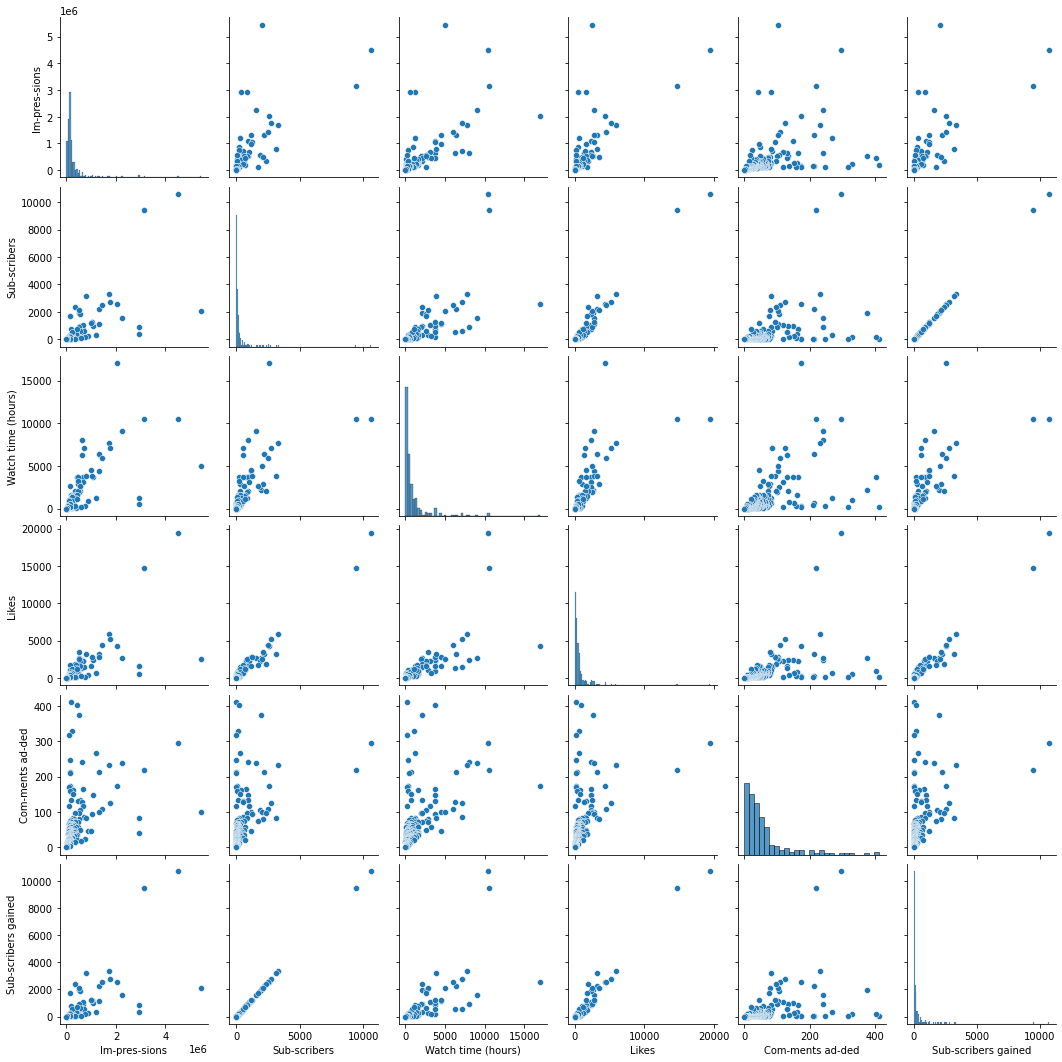

In [8]:
sns.pairplot(df)

If pay attention to the relationships between the most correlated variables, then a linear relationship between the values is very clearly visible. Therefore, the most appropriate machine learning algorithms for solving this problem would be Linear Regression and Decision Tree regressor. 

#### Splitting the data into training and test sets

Before cleaning the data it is nessesary to split the data to test and train datasets, so that when training the model, data that has been removed or built artificially is not taken into account

In [9]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)

df_train: (166, 6)
df_test: (56, 6)


The data is separated and using the *shape()* method we can see the volume of new sets. Further, for data processing and further model building, we will use the training set. We will not use the original table, in order to the data in it should not be changed.

We divided the test and training datasets into a standard size. Since the overall dataset is relatively small, it makes no sense to define any other size forcibly

#### Removing missing values

The need to remove null indicators was previously identified, so we will all rows, which contain null elements, using the dropna() method

In [10]:
df_train_cleaned = df_train.dropna()
print("df_train_cleaned:", df_train_cleaned.shape)

df_test_cleaned = df_test.dropna()
print("df_test_cleaned:", df_test_cleaned.shape)

df_train_cleaned: (166, 6)
df_test_cleaned: (56, 6)


Removing missing values process completed

#### Splitting Features and the Target Labe

When separating features and the target Label, we select the "Subscribers gained" column as the target, and the rest of the features are all, except for the "Sub­scribers gained" column

In [11]:
x_train = df_train_cleaned.drop(['Sub­scribers gained'], axis=1)
y_train = df_train_cleaned['Sub­scribers gained']
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

x_test = df_test_cleaned.drop(['Sub­scribers gained'], axis=1)
y_test = df_test_cleaned['Sub­scribers gained']
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (166, 5)
y_train: (166,)
x_test: (56, 5)
y_test: (56,)


## Training a Model

To select the best model and to avoid overfitting and underfitting, let's build two models of regression:

- Linear Regression
- Decision Tree 

These models were chosen because they are valid for solving the regression problem. Predictive modeling is the problem of developing a model using historical data to make a prediction on new data. It is just required to complete our business task. 

##### LinearRegression

Regression is an algorithm for modeling a target variable based on independent predictions. This algorithm is used to predict and find cause and effect relationships between variables. Implement the model with sklearn.linear_model.LinearRegression function

In [13]:
parameters_grid = {
              "fit_intercept": [True, False],
              "normalize": [True, False]
}
model = sklearn.model_selection.GridSearchCV(sklearn.linear_model.LinearRegression(),
                                              parameters_grid, cv = 2, n_jobs=-1)
model.fit(x_train, y_train)

print ("Best found hyperparameters of decision tree classifier = {}".format(model.best_params_))

Best found hyperparameters of decision tree classifier = {'fit_intercept': True, 'normalize': True}


##### Decision Tree

Decision Trees are a type of Supervised Machine Learning where the data is continuously split according to a certain parameter. Implement the model with sklearn.tree.DecisionTreeRegressor function

In [15]:
parameters_grid = {
    "max_depth": range (1,20,1),
    "min_samples_split": range(1,8,1)
}
model_2 = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeRegressor(),
                                              parameters_grid, cv = 2, n_jobs=-1)
model_2.fit(x_train, y_train)

print ("Best found hyperparameters of decision tree classifier = {}".format(model_2.best_params_))

Best found hyperparameters of decision tree classifier = {'max_depth': 14, 'min_samples_split': 3}


In this section of the report, we built two regression models to predict the number of subscribers for each new video. Then we need to choose the most appropriate model that will most accurately predict the target variable. For this we need to calculate and analyze regression metrics, score and loss

## Model's assessment

To assess the score of each of the models and then choose the most correct one, we need to calculate the following metrics

**1. Score function metrics:**
- R-squared (R2), which is the proportion of variation in the outcome that is explained by the predictor variables. In multiple regression models, R2 corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R-squared, the better the model.

**2. Loss functions for regression:**

A loss function measures how well a given machine learning model fits the specific data set. Loss functions play an important role in any statistical model - they define an objective which the performance of the model is evaluated against and the parameters learned by the model are determined by minimizing a chosen loss function. There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model, they are::
- Mean Absolute Error (MAE). MAE takes the average sum of the absolute differences between the actual and the predicted values. 
- Mean Squared Error (MSE). MSE is the average of the squared differences between the actual and the predicted values. 
- Root mean square error (RMSE). RMSE is the square root of difference of true dependent variable and predicted dependent variable

When choosing a model, we will need to pay attention to the model in which the above errors will be the smallest, because it is obvious that the perfect model will have errors tending to zero. 

Information taken from the site by Sthda: http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/#:~:text=R%2Dsquared%20(R2)%2C,squared%2C%20the%20better%20the%20model.

Information taken from the site by Section: https://www.section.io/engineering-education/understanding-loss-functions-in-machine-learning/

##### LinearRegression

In [16]:
y_test_predict = model.predict(x_test)
y_train_predict = model.predict(x_train)
test_score = r2_score(y_test, y_test_predict)
train_score = r2_score(y_train, y_train_predict)

print('r2 score of test dataset: ', test_score)
print('r2 score of train dataset: ', train_score)

if abs(test_score/train_score) > 0.8:
    print('The model is not overfitted.')
else:
    print('Need to improve the model.')
    
y_predict = model.predict(x_test)

print('MAE: ', mean_absolute_error(y_test, y_predict))
print('MSE: ', mean_squared_error(y_test, y_predict)) 
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_predict)))

r2 score of test dataset:  0.9997088870582729
r2 score of train dataset:  0.999941232680263
The model is not overfitted.
MAE:  5.035038265653668
MSE:  56.94374404511525
RMSE:  7.546107873938409


#### DecisionTree

In [17]:
y_test_predict_2 = model_2.predict(x_test)
y_train_predict_2 = model_2.predict(x_train)
test_score_2 = r2_score(y_test, y_test_predict_2)
train_score_2 = r2_score(y_train, y_train_predict_2)

print('r2 score of test dataset: ', test_score_2)
print('r2 score of train dataset: ', train_score_2)

if abs(test_score_2/train_score_2) > 0.8:
    print('The model is not overfitted.')
else:
    print('Need to improve the model.')
    
y_predict_2 = model_2.predict(x_test)

print('MAE: ', mean_absolute_error(y_test, y_predict_2))
print('MSE: ', mean_squared_error(y_test, y_predict_2)) 
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_predict_2)))

r2 score of test dataset:  0.9975501403506227
r2 score of train dataset:  0.9968306437233735
The model is not overfitted.
MAE:  10.419642857142858
MSE:  479.20982142857144
RMSE:  21.89086159630478


## Results

As a result of the evaluation of the two models, it is obvious that **the most suitable machine learning model is the Linear Regression Model**. This decision was made based on the analysis and comparison of the model evaluation metrics that were calculated in the previous section of the report.    

Information about what the metrics show:

**R-squared (R2)**, is a metric which shows the proportion of variation in the outcome that is explained by the predictor variables. When analyzing the results obtained, it can be seen that in the Linear Regression Model, the indicators calculated for the test and training data sets are as close as possible to each other and to unity. Such a result indicates the high performance of the model and the high predictive ability of the model and the low level of difference between the real and predicted datasets. However, the result of calculating such a metric for a Decision Tree shows a lower result.

However, both models are not overfitted, the difference between real and predictive datasets is minimal.

**Loss functions**, error metrics that are commonly used for evaluating and reporting the performance of a regression model. Based on the results of comparing all three calculated metrics MAE, MSE, RMSE, it is obvious that the errors made by the models are significantly lower for all metrics in the Linear Regression Model than in the Decision Tree.

Based on the above information, the choice of a Linear Regression Model to predict the number of new subscribers on a YouTube channel is obvious and justified. 

## Conclusion

In the context of this project, the following goals and results were achieved for the set business task. In order to achieve the most correct result, the following work was carried out:

- The existing dataset was analyzed, where such indicators as the volume of the dataset, data quality, data types were considered and further actions were determined to bring them into a more suitable form, which involves the further use of data to build a model for predicting the number of new subscribers on the YouTube channel.
- Given the large number of features in the original table and the presence of irrelevant features, an analysis was carried out and unnecessary data was excluded so as not to reduce the final accuracy of the Model. As a result, the dataset is cleared of irrelevant features.
- In the subsequent study of a more compact dataset, the presence of outliers was revealed, which could eventually significantly distort the final accuracy of the Model. Because the dataset was also cleared of outliers.
- To select the type of regression Model, visualization of the entire dataset was required, as a result of which obviously linear relationships between features and the target variable were identified, as a result of which the types of Machine Learning Models were selected to further achieve the business goal.
- So that there are no distortions in the final model, data preprocessing was also carried out, among which the missing data were deleted. Other preprocessing techniques were not required, since the existing original dataset did not require this
- As a result, two Regression Models were built and tested based on the available historical data on the YouTube channel
- Both models were evaluated using regression metrics and the best model was selected

In general, the dataset studied in this project made it possible to achieve the goal and build a model with relatively small losses and acceptable accuracy.

## Bibliography/References

Ken Jee. https://www.kaggle.com/datasets/kenjee/ken-jee-youtube-data?select=Aggregated_Metrics_By_Video.csv

Sthda. http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/#:~:text=R%2Dsquared%20(R2)%2C,squared%2C%20the%20better%20the%20model.

Section. https://www.section.io/engineering-education/understanding-loss-functions-in-machine-learning/